## Chart we want to reproduce

As a teaser for this post, let's see what the final picture will look like:

![stacked area chart with python](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-stacked-area-charts-on-a-map.png?raw=true)

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- `pandas` is used to put the data into a dataframe and data manipulation

And that's it!

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

In [7]:
data_url = 'https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/america-vote.csv'
df = pd.read_csv(data_url)

## Create the figure and axes

We'll start by creating the core of this chart: a `8 rows` and `11 columns` figure, with a total of 8x11=88 axes!

The complexity of this chart lies in the fact that we have to specify that **some of these axes will not be used**. The most intuitive way of doing this is to define a **list of tuples**, containing the positions of the axes we don't want to keep.

In our case, I set them to the respective positions in the code, although this has **absolutely no impact** on the output. It simply makes it easier to see **which axes will actually be deleted**. For example:
- `axis (0,0)` designates the axis in the first row and first column
- `axis (0,1)` designates the axis in the first row and second column
- `axis (2,5)` designates the axis in the third row and fifth column, and so on. 

Once we've done that, we'll make a `nested loop` (a loop within a loop) that will **iterate over all our axes**, testing whether they're in the list of axes to be deleted, and deleting them or not if necessary. Axes that are not deleted will still have a **title added with their position** for greater readability. 


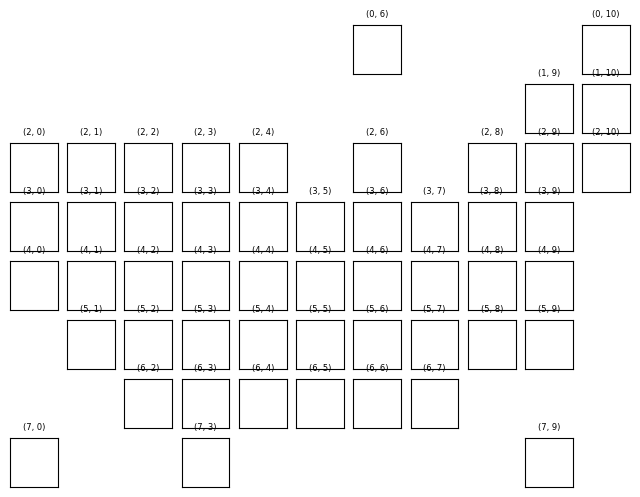

In [4]:
# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# Iteare over each ax
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # add a title and remove axis labels
        else:
            axs[row, col].set_title(f'({row}, {col})',
                                    fontsize=6)
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])

# Display the plot
plt.show()

## Add the first letters of each state

To add the country names corresponding to the correct axis, we:
- create a list of countries
- the **order of the list** must be constructed with the idea in mind that our code iterates over the first row, all the columns in that row, then the second row and so on.
- in the `else` of our code, we use the `annotate()` function on the axis on which we are iterating to add the letters of the state
- we use the **relative positions** (`xy=(0.5, 0.1)`) on each axis so that the letters are all positioned in the same place
- define a `state` variable which will **increase by 1** each time we come across an axis for which we want to add letters. This variable is used to retrieve the **letters of the right state** at each iteration.

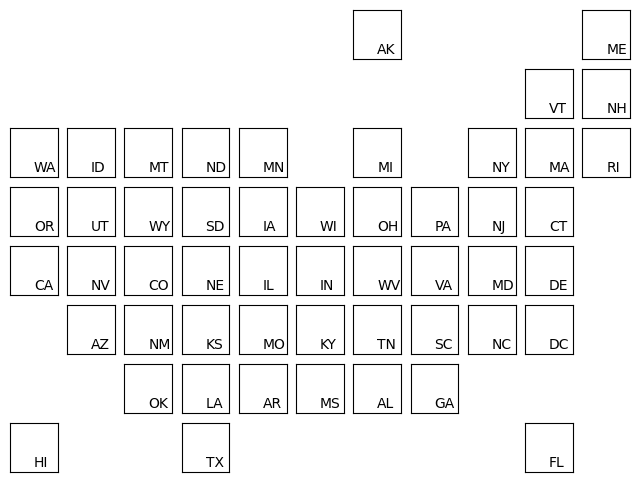

In [5]:
# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# define first letters of each state
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each ax
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # all axes we want to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # add state's letters
            letters = letters_state[state]
            axs[row, col].annotate(letters, xy=(0.5, 0.1),
                                   xycoords='axes fraction')
            state += 1


# Display the plot
plt.show()

## Stacked line chart

Adding all the **stacked line charts** in each axe:
- We filter data in a DataFrame `df` where the `state` column matches the `letters` in order to only get data about the right state
- We **pivots the filtered data** into a new DataFrame called `state_data`. This means we rearrange the data so that `year` becomes the index, `'party'` becomes the columns (each distinct label in party becomes a new column), and `pct` values are placed in the corresponding cells. If a combination of 'year' and 'party' is missing, we **fill the cell with 0**
- We **reset the index** of `state_data`, effectively making 'year' a regular column again
- We creates a stacked line chart: the chart is stacked, which means that **each line represents a party** (`republican`, `democrat`, `other`, `did not vote`) and the lines are stacked on top of each other for each year


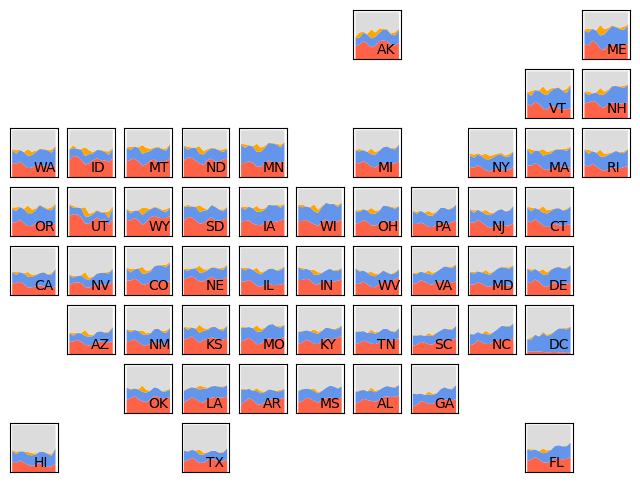

In [6]:
# colors for the charts
colors = ['tomato', 'cornflowerblue', 'orange', 'gainsboro']

# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# define first letters of each state
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each ax
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # all axes we want to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # add state's letters
            letters = letters_state[state]
            axs[row, col].annotate(letters, xy=(0.5, 0.1),
                                   xycoords='axes fraction')
            state += 1
            
            # filter on state data
            state_data = df[df['state']==letters]
            
            #pivot data
            state_data = state_data.pivot_table(index='year', columns='party',
                                                values='pct', aggfunc='first',
                                                fill_value=0)
            state_data.reset_index(inplace=True)
            
            # create the stacked line chart
            axs[row, col].stackplot(state_data['year'], state_data['republican'],
                                    state_data['democrat'], state_data['other'],
                                    state_data['did not vote'], colors=colors)
                                                                 

# Display the plot
plt.show()

## Final chart

All that's missing is a few annotations and changing the size of one chart, but the **hard part's over**! 

Thanks to the `text()` function, you can easily add **annotations of different sizes and styles**. For example, in `fig.text(0.3, 0.90, 'some text', ...)`:
- the first argument specifies that the text must be at **30% to the right** and the second at **90% upwards**
- we **center the text** using the `ha` and `va` arguments
- we change the **text size** using the `fontsize` argument
- we use a dictionnary of properties `font_params` for the title that defines the **font and other properties** to use

To change the size of the 'AK' graph, we perform a **special case** in our loop at position (0,6) to apply the `set_position()` function. It specifies the **new position and dimensions** of the graph in question.

We also take the opportunity to apply a **different text size** for the letters 'AK' for this chart.

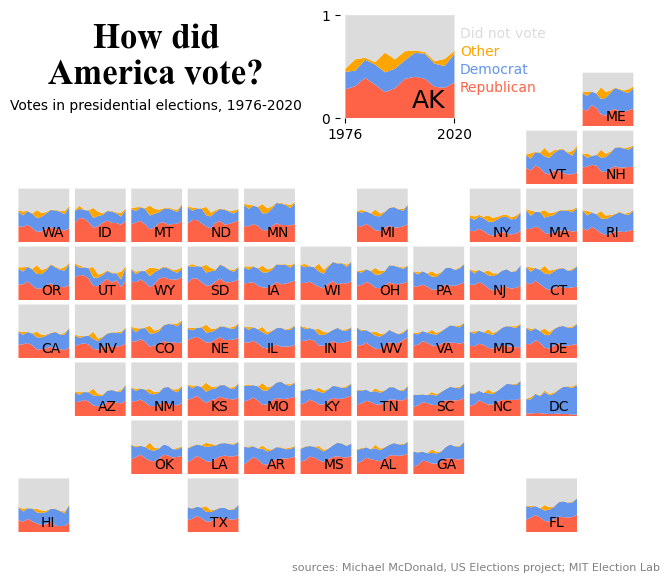

In [6]:
# colors for the charts
colors = ['tomato', 'cornflowerblue', 'orange', 'gainsboro']

# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(8, 6))
fig.subplots_adjust(wspace=0.01, hspace=0.03)

# define positions of rows that we want off
rows_to_remove = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),        (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# define first letters of each state
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each ax
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # test the presence of the current ax in the list defined above
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # all axes we want to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # add state's letters
            letters = letters_state[state]
            
            # special case for the bigger chart of AK
            if (row, col) == (0, 6):
                axs[row, col].set_position([0.53, 0.8, 0.15, 0.18])
                axs[row, col].annotate(letters, xy=(0.6, 0.1),
                                   xycoords='axes fraction', fontsize=18)
                # Add axis labels
                axs[row, col].set_xticks([1976, 2020])
                axs[row, col].set_yticks([0, 1])
            else:
                axs[row, col].annotate(letters, xy=(0.45, 0.1),
                                   xycoords='axes fraction')
                
            state += 1
            
            # filter on state data
            state_data = df[df['state']==letters]
            
            #pivot data
            state_data = state_data.pivot_table(index='year', columns='party',
                                                values='pct', aggfunc='first',
                                                fill_value=0)
            state_data.reset_index(inplace=True)
            
            # create the stacked line chart
            axs[row, col].stackplot(state_data['year'], state_data['republican'],
                                    state_data['democrat'], state_data['other'],
                                    state_data['did not vote'], colors=colors)
            
            # remove spines around axe
            axs[row, col].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
                                                                 

# Source, title and subtitle
title = 'How did\nAmerica vote?'
font_params = {'fontfamily': 'serif',
               'fontname': 'Times New Roman',
               'fontsize': 25, 'weight': 'bold'}
fig.text(0.3, 0.90, title,
         ha='center', va='center',
         **font_params)
fig.text(0.3, 0.82, 'Votes in presidential elections, 1976-2020',
         ha='center', va='center',
         fontsize=10)
fig.text(0.7, 0.05, 'sources: Michael McDonald, US Elections project; MIT Election Lab',
         ha='center', va='center',
         fontsize=8, color='grey')

# Legend in the 'AK'
fig.text(0.68, 0.94, 'Did not vote',
         va='center',
         fontsize=10, color='gainsboro')
fig.text(0.68, 0.91, 'Other',
         va='center',
         fontsize=10, color='orange')
fig.text(0.68, 0.88, 'Democrat',
         va='center',
         fontsize=10, color='cornflowerblue') 
fig.text(0.68, 0.85, 'Republican',
         va='center',
         fontsize=10, color='tomato')

# Display the plot
plt.show()

## Going further

This article explains how to reproduce a geographical map with [stacked line chart](https://python-graph-gallery.com/stacked-area-plot/) with annotations, custom style and nice features. 

For more examples of **advanced customization** in line charts, check out this [amazing stacked line chart](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/). Also, you might be interested in a [line chart with labels at end of each line](https://python-graph-gallery.com/web-line-chart-with-labels-at-line-end/).